In [1]:
%load_ext autoreload
%autoreload 2

import sys
import os
import time

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# %matplotlib notebook

sys.path.append(os.environ['REPO_DIR'] + '/utilities')
from utilities2015 import *
from registration_utilities import *
from metadata import *
from data_manager import *

Setting environment for Precision WorkStation


No vtk
No vtkNot using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.


/media/yuncong/BstemAtlasData/CSHL_data_processed/MD585/MD585_prep2_thumbnail/MD585-N16-2015.07.16-20.32.33_MD585_2_0047_prep2_thumbnail.tif
/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_thumbnail/MD589-N16-2015.07.30-17.03.43_MD589_3_0048_prep2_thumbnail.tif
/media/yuncong/BstemAtlasData/CSHL_data_processed/MD590/MD590_prep2_thumbnail/MD590-IHC17-2015.08.10-19.09.09_MD590_2_0050_prep2_thumbnail.tif
/media/yuncong/BstemAtlasData/CSHL_data_processed/MD591/MD591_prep2_thumbnail/MD591-IHC17-2015.08.28-04.23.47_MD591_1_0049_prep2_thumbnail.tif
/media/yuncong/BstemAtlasData/CSHL_data_processed/MD592/MD592_prep2_thumbnail/MD592-N16-2015.08.22-00.50.39_MD592_2_0047_prep2_thumbnail.tif
/media/yuncong/BstemAtlasData/CSHL_data_processed/MD593/MD593_prep2_thumbnail/MD593-N15-2015.08.21-16.53.02_MD593_3_0045_prep2_thumbnail.tif
/media/yuncong/BstemAtlasData/CSHL_data_processed/MD594/MD594_prep2_thumbnail/MD594-IHC16-2015.08.26-16.11.01_MD594_1_0046_prep2_thumbnail.tif
/media/

Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.


/media/yuncong/BstemAtlasData/CSHL_data_processed/MD657/MD657_prep2_thumbnail/MD657-N13-2017.02.22-14.33.34_MD657_3_0039_prep2_thumbnail.tif
/media/yuncong/BstemAtlasData/CSHL_data_processed/MD658/MD658_prep2_thumbnail/MD658-N18-2017.03.31-17.34.22_MD658_2_0053_prep2_thumbnail.tif
/media/yuncong/BstemAtlasData/CSHL_data_processed/MD661/MD661_prep2_thumbnail/MD662&661-F30-2017.06.05-14.49.48_MD661_1_0088_prep2_thumbnail.tif
/media/yuncong/BstemAtlasData/CSHL_data_processed/MD662/MD662_prep2_thumbnail/MD662&661-F35-2017.06.05-17.08.18_MD662_1_0103_prep2_thumbnail.tif
rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/ChatCryoJane201710/ChatCryoJane201710_prep2_thumbnail/ChatCryoJane201710_slide1-S1_prep2_thumbnail.tif" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/ChatCryoJane201710/ChatCryoJane201710_prep2_thumbnail"
0
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/ChatCryoJane201710/ChatCryoJane201710_prep2_thumbnail/ChatCryoJane201710_slide1-S1_prep2_

Not using image_cache.
Not using image_cache.


In [2]:
correction_size_normalized = {stack: {} for stack in all_nissl_stacks}
correction_size = {stack: {} for stack in all_nissl_stacks}

for stack in all_nissl_stacks:
    
    print stack
    
    structures = load_hdf_v2(DataManager.get_annotation_filepath(stack=stack, 
                                                by_human=True,
                               timestamp='latest', suffix='structures'))
    
    for _, entry in structures.iterrows():
        tf = np.eye(4)
        edits = entry['edits']
        for edit in edits:
#             print edit['type']
            if 'type' in edit:
                if edit['type'] == 'shift3d' or edit['type'] == 'rotation3d':
                    T = consolidate(edit['transform'], edit['centroid_m'], edit['centroid_f'])
                    print edit['type'], T[:3,3]
                    tf = np.dot(T, tf)
                    
        d_um = np.linalg.norm(tf[:3,3])*convert_resolution_string_to_voxel_size(resolution='down8', stack=stack)
        
        structure_vol = bp.unpack_ndarray_str(entry['volume_in_bbox'])
        structure_length_um = get_structure_length_at_direction(structure_vol, tf[:3,3]) * convert_resolution_string_to_voxel_size(resolution='down8', stack=stack)
        
        print entry['name'], entry['side'], d_um, structure_length_um
        
        name_s = compose_label(entry['name'], entry['side'])
        correction_size[stack][name_s] = d_um
        correction_size_normalized[stack][name_s] = d_um / structure_length_um
        
    print '\n'

MD585
aws s3 cp --recursive "s3://mousebrainatlas-data/CSHL_labelings_v3/MD585" "/home/yuncong/CSHL_labelings_v3/MD585" --exclude "*" --include "*structures*"
0
latest timestamp:  11012017011336
shift3d [  0.         -80.3355126  320.08680801]
shift3d [ 45.29604906 -26.35406491   0.        ]
shift3d [ 24.37776192 -14.33985995   0.        ]
SNC R 1285.1481512526045 968.4274236560861


MD589
aws s3 cp --recursive "s3://mousebrainatlas-data/CSHL_labelings_v3/MD589" "/home/yuncong/CSHL_labelings_v3/MD589" --exclude "*" --include "*structures*"
0
latest timestamp:  10312017220310
shift3d [-3.33543634  0.         47.36319603]
shift3d [   2.9648323    0.        -136.3822859]
shift3d [13.34174536  0.         60.03785412]
shift3d [ 0.         -3.29425811 20.58911321]
3N L 58.1312309204829 453.0709153627252
shift3d [-1.48241615  0.         53.36698144]
shift3d [ 0.         -0.82356453 24.70693585]
3N R 287.3797831744257 243.01677308577902
shift3d [0. 0. 0.]
shift3d [23.75616484 11.29005854  0.  

In [8]:
print np.median([y for x in correction_size.values() for y in x.values()])

252.71604456793955


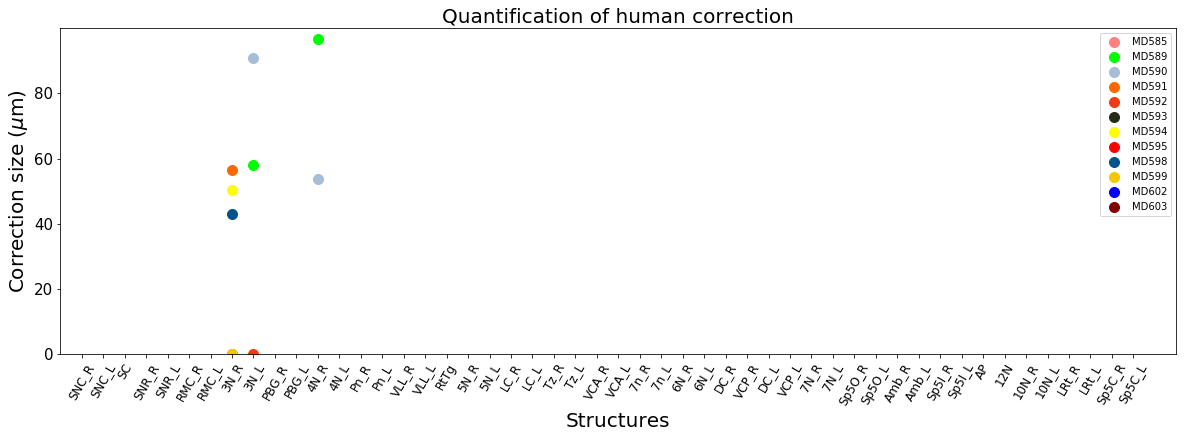

In [6]:
plot_by_stack_by_structure(correction_size, 
                           structures=structures_sided_sorted_by_rostral_caudal_position,
                           ylabel='Correction size ($\mu$m)',
                           title='Quantification of human correction',
                          yticks=np.arange(0, 100, 20),
                           yticklabel_fmt='%d',
                          stack_to_color=stack_to_color)

In [10]:
print np.nanmedian([y for x in correction_size_normalized.values() for y in x.values()])

0.8103015308379348


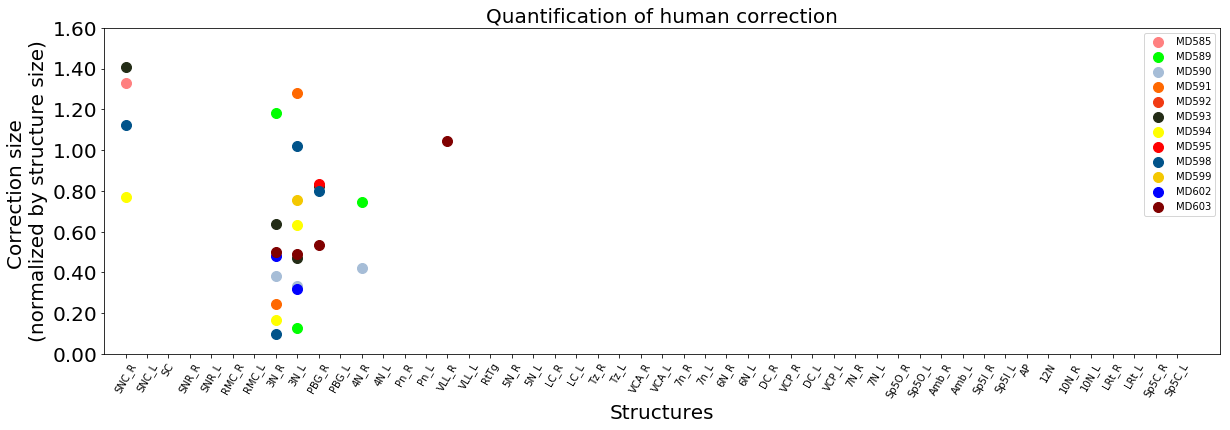

In [7]:
plot_by_stack_by_structure(correction_size_normalized, 
                           structures=structures_sided_sorted_by_rostral_caudal_position,
                           ylabel='Correction size \n(normalized by structure size)',
                           title='Quantification of human correction',
                          ylim=[0, 1.6],
                          stack_to_color=stack_to_color)

# Human confidence vs machine confidence

In [ ]:
eval_form = read_csv('/home/yuncong/Brain/automatic_annotation_evaluation.csv')

In [ ]:
low_zscore = defaultdict(dict)
low_x_width = defaultdict(dict)
low_y_width = defaultdict(dict)
low_z_width = defaultdict(dict)
machine_confidence = defaultdict(dict)
human_correction = defaultdict(dict)

structure_names = list(eval_form['Unnamed: 0'][0:51])
for _, x in eval_form.iterrows():
    s = x['Unnamed: 0']
    for st in all_nissl_stacks:
        val = x[st]
        if isinstance(val, str):
            if '*' in val:
                low_zscore[s][st] = True
                machine_confidence[s][st] = 0.
            if 'x' in val:
                low_x_width[s][st] = True
                machine_confidence[s][st] = 0.
            if 'y' in val:
                low_y_width[s][st] = True
                machine_confidence[s][st] = 0.
            if 'z' in val:
                low_z_width[s][st] = True
                machine_confidence[s][st] = 0.
            if 'w' in val:
                human_correction[s][st] = 1
            if 'c' in val:
                human_correction[s][st] = 0
            if 'i' in val:
                human_correction[s][st] = .5
        else:
            machine_confidence[s][st] = 1.
            human_correction[s][st] = 0

In [ ]:
machine_confidence_df = pd.DataFrame(machine_confidence, columns=structure_names)

human_correction_df = pd.DataFrame(human_correction, columns=structure_names)

machine_confidence_unsided = {}
for s in all_known_structures:
    if s not in singular_structures:
        lname = convert_to_left_name(s)
        rname = convert_to_right_name(s)
        machine_confidence_unsided[s] = machine_confidence_df[[lname, rname]].stack().mean()
    else:
        machine_confidence_unsided[s] = machine_confidence_df[s].mean()
        
human_correction_unsided = {}
for s in all_known_structures:
    if s not in singular_structures:
        lname = convert_to_left_name(s)
        rname = convert_to_right_name(s)
        human_correction_unsided[s] = human_correction_df[[lname, rname]].stack().mean()
    else:
        human_correction_unsided[s] = human_correction_df[s].mean()
        
plt.figure(figsize=(10,10));
for s in all_known_structures:
    plt.text(human_correction_unsided[s] + .05 * (2*np.random.random(1)-1), 
             machine_confidence_unsided[s] + .05 * (2*np.random.random(1)-1), 
             s=s, fontsize=20)
plt.xlim(-0.1, 1.1);
plt.ylim(-0.1, 1.1);
plt.ylabel('Machine confidence', fontsize=20);
plt.xlabel('Amount of human correction', fontsize=20);